# Project: Investigate a Dataset - The Moive Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>The movie dataset is a dataset of about 10,000 plus movies collected from The Movie Database (TMDb). This dataset contains information about movies produced and released from around 1960 to around 2015. The information contained about the movies in this dataset include the year of release of these movies, the cast of the movies, the user ratings and populuarity of these moives, the production budgets and revenues generated by these movies as well as the production companies of the movies and others.

>Some columns of this dataset, such as the ‘cast’ and ‘genres’, contain multiple values separated by a pipe (|). In instances where we will use such columns in our analysis, we will do well to split the values into individual values in order to aid the analysis process.


>The movie dataset consists of twenty (20) columns, namely:
><ul>								
    <li>id</li>
    <li>imdb_id</li>
    <li>popularity</li>
    <li>budget</li>
    <li>revenue</li>
    <li>original_title</li>
    <li>homepage</li>
    <li>director</li>
    <li>tagline</li>
    <li>keywords</li>
    <li>overview</li>
    <li>runtime</li>
    <li>genres</li>
    <li>production_companies</li>
    <li>release_date</li>
    <li>vote_count</li>
    <li>vote_average</li>
    <li>release_year</li>
    <li>budget_adj</li>
    <li>revenue_adj</li>
></ul>

>After carefully visually analysing the dataset, it was observed that some of columns may not be necessary for the kind of exploration and analysis that I want to make. On account of that, I have dropped these columns before the exploration and analysis begin. In particular, I have dropped the following columns:
><ul>				
    <li>id</li>
    <li>imdb_id</li>
    <li>cast</li>
    <li>homepage</li>
    <li>director</li>
    <li>tagline</li>
    <li>keywords</li>
    <li>overview</li>
    <li>production_companies</li>
    <li>release_date</li>
></ul>

>This leaves the following columns (11) to be used for the data exploration and analysis:
><ul>								
    <li>popularity</li>
    <li>budget</li>
    <li>revenue</li>
    <li>original_title</li>
    <li>runtime</li>
    <li>genres</li>
    <li>vote_count</li>
    <li>vote_average</li>
    <li>release_year</li>
    <li>budget_adj</li>
    <li>revenue_adj</li>
></ul>

>The columns and significance of each table are explained below:

>**popularity**: The movie's popularity shows how popular a movie is among its viewers which can be calculated by a number of ways, including using the number of user votes on that movie 

>**budget**: The movie's budget indicates the cost of production of the movie. This includes production, development, marketing and advertising, casts and other allied costs

>**revenue**: The movie's indicates the revenue generated from the movie. This includes ticket prices at cinemas, streaming and television rights, foreign sales and, possibly, sales from merchandises

>**original_title**: This column indicates the movie's originally planned title or name

>**genres**: Genre indicates the movie's theme or category 

>**vote_count**: The movie's vote count indicates the number of user votes on the movie

>**release_year**: This indicates the year in which the movie was released

>**budget_adj**: This the movie's production budget adjusted in include inflation over the years

>**revenue_adj**: This the movie's production revenue adjusted in include inflation over the years



### Question(s) for Analysis
>In order to analyse the dataset, and explore the (possible) relationship(s) between it's variables some questions need to be asked, questions which will be answered during the data analysis. On account of that, I have formed the following questions to explore further the relationships between the variables in the dataset:
><ol>
    <li>What are the average production budget and revenues of movies during the period under review?</li>
    <li>How have movie production budgets and revenues changed over the years during the period under review?</li>
    <li>Does the revenue generated by a movie directly depend on the cost of production of that movie?</li>
    <li>Does the popularity/user ratings of a movie and directly affect the movie's revenue generated?</li>
    <li>
        <ol type="a">
            <li>Which genre(s) of moives cost(s) more to produce and/or generate(s) the highest revenues?</li>
            <li>Which genre(s) of moives are most popular from year to year?</li>
        </ol>
    </li>
</ol>

>We will answer these questions during in the course of our data analysis

In [6]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.7MB/s eta 0:00:01 0% |                                | 30kB 10.0MB/s eta 0:00:02    19% |██████▏                         | 2.0MB 12.7MB/s eta 0:00:01    38% |████████████▎                   | 4.0MB 13.3MB/s eta 0:00:01    51% |████████████████▍               | 5.3MB 14.9MB/s eta 0:00:01    61% |███████████████████▉            | 6.5MB 13.9MB/s eta 0:00:01    96% |██████████████████████████████▉ | 10.1MB 15.7MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.4MB/s eta 0:00:01   14% |████▋                           | 1.9MB 12.3MB/s eta 0:00:01    19% |██████▎                         | 2.6MB 33.0MB/s eta 0:00:01    30% |█████████▉                      | 4.1MB 20.6MB/s eta 0:00:01    35% |███████████▍                    | 4.8MB 14.3MB/s eta 0:00:01    50% |████████████████▏               | 6.8MB 12.7MB/s eta 0:00:01    55% |█████████████████▊              | 7.4MB 14.3MB/s eta 0:00:01    70% |██████████████████████▍    

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, we will load the dataset and clean for the analysis. Also, all errant data, if any, will be addressed.

In [2]:
#load the movies dataset and check for possible missing or errant data

df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning
> From the sample data in the preceding cell, it is seen that not all the columns will be needed for the analysis of the data. In that regard, it will be necessary to drop those columns in order to trim the dataset to what actually will be needed for the analysis
 

In [63]:
#Checking the completeness or otherwise of the dataset. Some columns have missing data, but those columns are not
#necessary for the data analysis so they will be ignored and/or dropped

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Some columns of the dataset are not needed for the analysis and so will be dropped

In [3]:
#dropping unnecessary columns from the dataset (id, imdb_id, cast, homepage, director, tagline, overview, keyowrds, production_companies)
df.drop(['id',  'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'overview', 'keywords', 'production_companies', 'release_date'], axis = 1, inplace = True)

df.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


#### In the preceding cell, we dropped the columns id,  imdb_id, cast, homepage, director, tagline, overview, keywords and production_companies since they will not be used in the data analysis

<a id='eda'></a>
## Exploratory Data Analysis

>In this section, we will start with the exploration and analysis of the dataset. This will included exploring the properties of the dataset, and making some inferences from the observed relationships between the variables of the dataset. We will also create some visualizations of some of the observations during our analysis of the dataset.


### Research Question 1: What are the average production budget and revenues of movies during the period under review?

In [4]:
#get an overview of the dataset to answer some very basic questions about it
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Overview of the dataset

From the preceding cell, the following observations are made:
<ol>
    <li>Majority of the movies from 1960 to 2015 were released from the year 2001 with 50% of them being released around 2006</li>
    <li>Average revenue generated from a movie is about 39.8 million USD adjusted to about 51.4 million USD taking  inflation into consideration</li>
    <li>Average budget needed to produce a movie is about 14.6 million USD adjusted to 17.6 million USD taking inflation into consideration</li>
    <li>From 1960 to 2015, the highest budget for a moive production is 425 million USD</li>
    <li>From 1960 to 2015, the highest grossing movie raked in a whooping 2.78 billion USD adjusted to 2.83 billion USD taking inflation into consideration. We shall investigate which movie that was</li>
</ol>

The observations are also visualized in the scatter diagrams below

### Research Question 2: How have movie production budgets and revenues changed over the years during the period under review?

In order to establish a establish how the budgets and revenues of movies have changed over the course of time for the period under review, we will create some visualizations to answer those questions

#### Since we will be doing a lot of visualizations, we will define some helper functions to speed up plotting our charts/diagrams.

In [5]:
#helper function to plot histograms given a specific column(s)
def plot_hist(column) :
    column.hist()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation = 90)
    plt.show()

#helper function to plot scatter diagrams given some specific column(s)
#the size of the markers (s) will be a default 1 for all scatter plots
def plot_scatter() :
    df.plot.scatter(x, y, s=1)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show();

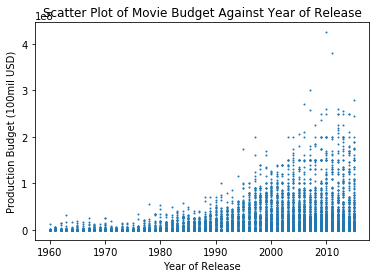

In [6]:
#plotting a scatter diagram of movie budget against year of release
x='release_year'
y='budget'
title = 'Scatter Plot of Movie Budget Against Year of Release'
xlabel = 'Year of Release'
ylabel = 'Production Budget (100mil USD)'
plot_scatter()

In [ ]:
df.hist(['revenue'], ['budget'])

There is a generally strong positive correlation between the year of release of a movie and the movie's production budget. More precisely, movies released from 1990 saw a sharp rise in their production budgets as compared to those movies released before 1990.

There is, however, an outlier with a budget of about 425 million USD for a movie released around 2010. This needs further investigation which is down in the cell below

In [8]:
#investigating the outlier production budget
max_budget = df.budget.max()
df.query('budget == @max_budget')

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.25054,425000000,11087569,The Warrior's Way,100,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010,425000000.0,11087569.0


From the preceding cell, it can be observed that the move *The Warrior's Way*, released in 2010, used the most budget of 425 million USD but generated very little in revenue compared to the production budget (about 11 million USD). The movies poor revenue generation ***may*** be due to its low popularity and user ratings

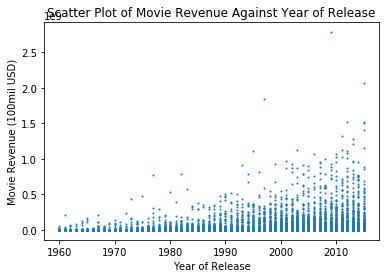

In [7]:
#plotting a scatter diagram of movie revenue against year of release to establish a relationship between the two
x='release_year'
y='revenue'
title = 'Scatter Plot of Movie Revenue Against Year of Release'
xlabel = 'Year of Release'
ylabel = 'Movie Revenue (100mil USD)'
plot_scatter()

Similarly, there is a generally strong positive correlation between the year of release of a movie and the movie's revenue, with some few outliers which will be investigated further.

In the following cells, we will visualize further the relationship between movie budget and revenue against the year of release in a super-imposed bar chart.

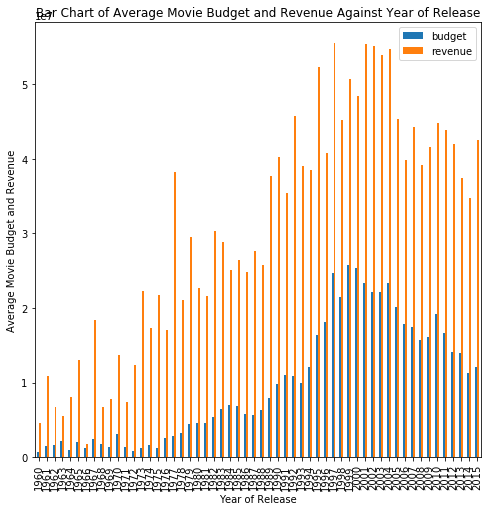

In [22]:
#plotting bar charts for budget and revenue based on the year of release
title = 'Bar Chart of Average Movie Budget and Revenue Against Year of Release'
xlabel = 'Year of Release'
ylabel = 'Average Movie Budget and Revenue'
df.groupby('release_year')[['budget', 'revenue']].mean().plot(kind = 'bar', figsize=(8,8))
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title(title)
plt.show();

The bar charts above shows that the average cost of movie production and revenue have increased dramatically over the years for the period under review

#### Investigating the outlier in the movie revenue
 The most significant outlier is a revenue of about 2.78 billion USD which needs further investigation. This is done in the cell below

In [11]:
#investigating the revenue outlier
max_revenue = df.revenue.max()
df.query('revenue == @max_revenue')

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09


From the preceding cell, the move ***Avatar***, released in 2009 with a production budget of 273 million USD, generated a revenue of about 2.78 billion USD adjusted to 2.83 billion USD. Further observations reveal that the movie had one of the highest user votes with a ***vote_count*** of 8,458 even though its popularity rating wasn't the highest. The movie's genre(s) could also be a factor in its success. We will analyze that too in the cells below

### Research Question 3: Does the revenue generated by a movie directly depend on the cost of production of that movie?

In order to establish a relationship between a movie's budget and its revenue, we will plot a scatter diagram of the movie's budget against its revenue

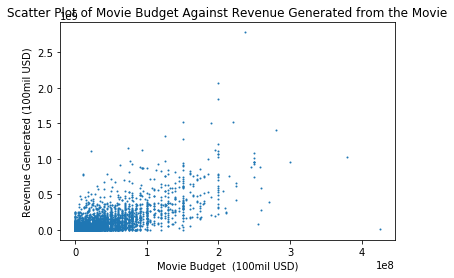

In [12]:
#plotting scatter diagram of movie budget against revenue in order to establish
#a relationship between the two variables
x='budget'
y='revenue'
title = 'Scatter Plot of Movie Budget Against Revenue Generated from the Movie'
xlabel = 'Movie Budget  (100mil USD)'
ylabel = 'Revenue Generated (100mil USD)'
plot_scatter()

From the scatter plot above, it can be observed that there is generally a positive correlation between a movie's production budget and the revenue accrued from the movie. The same, however, cannot be said for some movies. This anomaly has already been investigated above.
*The Warior's Way*, released in 2010 with a budget of 425 million USD which generated a revenue of a little above 11 million USD.

### Research Question 4: Does the popularity/user ratings of a movie and directly affect the movie's revenue generated?

In order to establish a relationship between a movie's popularity/vote counts and its revenue, we will plot a scatter diagram of the movie's popularity and vote count against its revenue

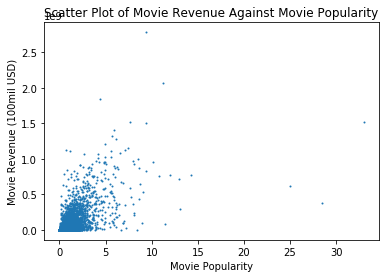

In [13]:
#plotting scatter diagram of movie revenue against popularity in order to establish
#a relationship between the two variables
x ='popularity'
y ='revenue'
title = 'Scatter Plot of Movie Revenue Against Movie Popularity'
xlabel = 'Movie Popularity'
ylabel = 'Movie Revenue (100mil USD)'
plot_scatter()

From the scatter plot above, it can be observed that movie popularity has a positive correlation with revenue. The few exceptions have been discussed above. Notable among them is *Avatar* that had a not-so-encouraging popularity but generated the highest revenue. 

In [69]:
#investigating popularity outlier
max_popularity = df.popularity.max()
df.query('popularity == @max_popularity')

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09


From the cell above, *Jurassic World* had the highest popularity rating of approx. 33 but generated less revenue (1.5 billion USD) than *Avatar* (2.78 billion USD) which had a popularity rating of just 9.4.

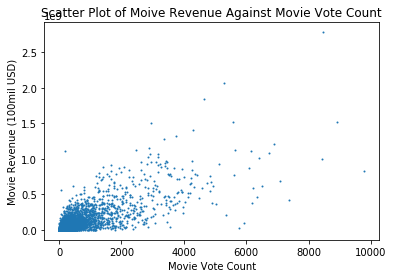

In [33]:
#plotting scatter diagram of movie revenue against vote count in order to establish
#a relationship between the two variables
x='vote_count'
y='revenue'
title = 'Scatter Plot of Moive Revenue Against Movie Vote Count'
xlabel = 'Movie Vote Count'
ylabel = 'Movie Revenue (100mil USD)'
plot_scatter()

From the scatter diagram above, it can be observed that movie vote count has a positive correlation with revenue, albeit weak. The exceptions here share the same characteristics as in the popularity ratings, which have already been discussed above.

### Trivia: What percentage of movies made profits (revenue larger than budget) for the period under review?

In [17]:
#calculate total number of movies that made profit to find the percentage of movies that made profit from 1960 to 2015
movie_profit = df.query('revenue > budget').shape[0]
total_movies = df.shape[0]

percentage_movie_profits = movie_profit/total_movies*100

percentage_movie_profits

34.72298914043807

Per the calculated percentage above, only 34.7 percent of all movies produced from 1960 to 2015 made some profits

### Research Question 5(a): Which genre(s) of moives cost(s) more to produce and/or generate(s) the highest revenues?

In order to answer these questions, we will explode the genres into individual genres, and observe any relationship between the individual genres on the one hand, and the budget and revenue of the movies on the other hand

In [8]:
#split movie genres into individual genres and count the number of occurences of each
genre = df.genres.str.split('|').explode()
genre.value_counts()

Drama              4761
Comedy             3793
Thriller           2908
Action             2385
Romance            1712
Horror             1637
Adventure          1471
Crime              1355
Family             1231
Science Fiction    1230
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genres, dtype: int64

Now that we have the individual genres as well as their number of occurrences, we can visualiaze them in a bar chart

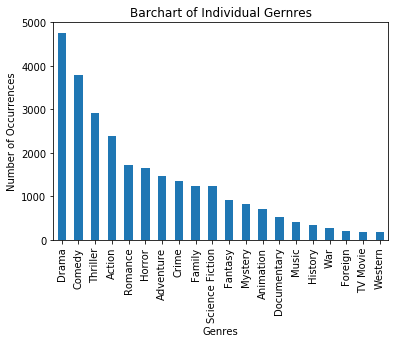

In [9]:
#plotting a bar chart to visualize the individual genres
title='Barchart of Individual Gernres'
xlabel='Genres'
ylabel='Number of Occurrences'
genre.value_counts().plot(kind='bar')
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show();

From the Bar Chart above, it can be observed that the Drama genre has the highest number of occurrences, followed by Comedy, Thriller and Action in that order. This does not in any way answer the question ***Which genre(s) of moives cost(s) more to produce and/or generate(s) the highest revenues?*** To answer these questions, we will have to investigate a little further. This is done in the cells below

#### Let's see how the genres are distributed

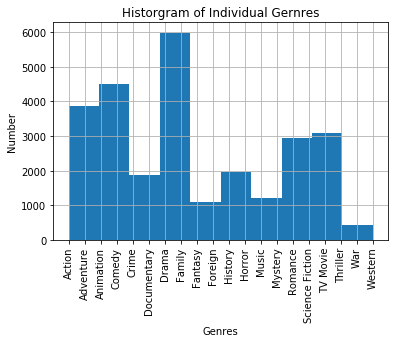

In [10]:
#plotting a histogram of the individual genres to observe their distribution
title='Historgram of Individual Gernres'
xlabel='Genres'
ylabel='Number'
plot_hist(genre)

From the histogram above, it can be observed that the distribution of the individual genres is skewed to the right, and that the genres are not normally distributed. Does this mean that there is a general preference to produce more genres than others? What are the reasons for this? We will find out in the analysis in the following cells

In [13]:
#investigating the genre(s) that cost more to produce and/or generate the most revenues
df_genres = df.assign(genres = df.genres.str.split('|'))
df_genres=df_genres.explode('genres')

In [14]:
df_genres.groupby('genres')[['budget', 'revenue']].mean().sort_values(by=['budget', 'revenue'], ascending=False)

,budget,revenue
genres,,
Adventure,3.754369e+07,1.131379e+08
Fantasy,3.261259e+07,9.631366e+07
Action,2.772877e+07,7.276462e+07
Science Fiction,2.497677e+07,7.008432e+07
Family,2.335934e+07,7.243318e+07
Animation,2.315978e+07,7.525606e+07
War,2.089189e+07,4.760518e+07
Western,1.897411e+07,2.856871e+07
History,1.859492e+07,3.201179e+07


From the above cell, it can be observed that Adventure movies cost more averagely to produce (highest average budget) but they also generate more revenue averagely (highestd average revenue among the genres). Specifically, the average budget for Adventure-themed movies is around 375 million USD. Such genre of movies also generate an average of 1.13. billion USD in revenue

A visualization of the observation is given below

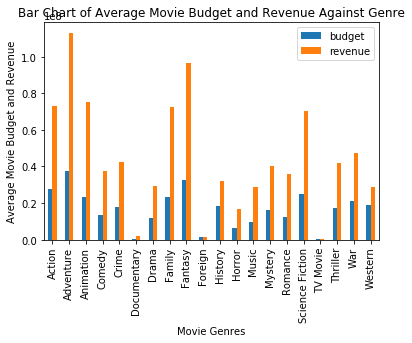

In [29]:
#investigating which genres cost more to produce (higher budget) and which ones generate more revenue
#through visualization

title='Bar Chart of Average Movie Budget and Revenue Against Genre'
xlabel='Movie Genres'
ylabel='Average Movie Budget and Revenue'
df_genres.groupby('genres')[['budget', 'revenue']].mean().plot(kind = 'bar')
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

From the visualization above, it can be observed that movies in the Adventure-themed genres have the highest budget (cost more to produce) but also generate the highest revenue. Maybe that explains why movie producers prefer Adventure genres to the others: **they generate more revenue than the other genres**.

### Research Question 5(b): Which genre(s) of moives are most popular from year to year?

In [18]:
#investigating which genre(s) of movies are most popular from year to year
df_genres.groupby(['release_year','genres'])[['popularity', 'vote_count']].mean().sort_values(by=['release_year', 'popularity', 'vote_count'], ascending=False)

popularity   vote_count
release_year genres                                  
2015         Adventure          3.283786  1034.507246
             Western            3.178796  1178.666667
             Action             2.251415   688.495327
             Science Fiction    2.245603   682.732558
             Fantasy            1.740228   517.727273
...                                  ...          ...
1960         Crime              0.346480    25.500000
             Science Fiction    0.327905    46.666667
             Family             0.278064    28.000000
             War                0.225863    13.000000
             Foreign            0.194948    12.000000

[1049 rows x 2 columns]

From the information above, it can be observed that ***Adventure*** is the most popular genre from year to year

#### Visualizing the distribution of movie genre popularity and vote count over the years

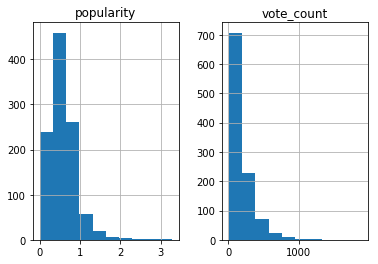

In [36]:
#plotting a histogram to show the distribution of movie genre popularity and vote count over the years
df_genres.groupby(['release_year','genres'])[['popularity', 'vote_count']].mean().hist();

From the histograms above, it can be observed that the distributions of average movie genre popularity and vote counts over the years for the period under review haven't been normal. The distributions have been more skewed to the right over the years. This shows that movie-goers have a much more preference for certain genres over others.
We will viasualize that more clearly in barcharts in the following cell.

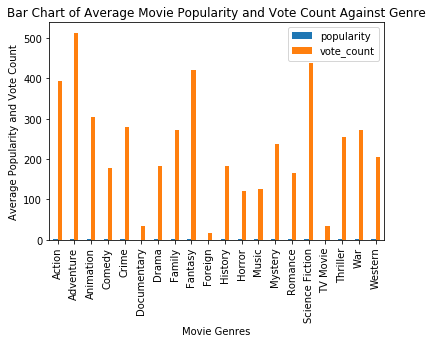

In [28]:
#investigating which genres have more average popularity ratings and more average vote counts through visualization

title='Bar Chart of Average Movie Popularity and Vote Count Against Genre'
xlabel='Movie Genres'
ylabel='Average Popularity and Vote Count'
df_genres.groupby('genres')[['popularity', 'vote_count']].mean().plot(kind = 'bar')
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

Observably, there is a high preference for Adventure over the other genres.

<a id='conclusions'></a>
## Conclusions

The TMDb dataset has some interesting characteristics about movies released from 1960 to 2015. These characteristics have been explored, analysed and visualized above. The analysis and visualizations gave us some insights to answer the questions posed before the start of the data analysis process. 

We conclude this process by summarising our observations in this section, which will also help us answer the questions posed.

><ol>
    <li>What are the average production budget and revenues of movies during the period under review?</li>
    <li>How have movie production budgets and revenues changed over the years during the period under review?</li>
    <li>Does the revenue generated by a movie directly depend on the cost of production of that movie?</li>
    <li>Does the popularity/user ratings of a movie and directly affect the movie's revenue generated?</li>
    <li>
        <ol type="a">
            <li>Which genre(s) of moives cost(s) more to produce and/or generate(s) the highest revenues?</li>
            <li>Which genre(s) of moives are most popular from year to year?</li>
        </ol>
    </li>
</ol>

We will now answer the questions one after the other.
#### Question 1: What are the average production budget and revenues of movies during the period under review?
#### Answer:
>Average revenue generated from a movie is about 39.8 million USD adjusted to about 51.4 million USD taking  inflation into consideration

>Average budget needed to produce a movie is about 14.6 million USD adjusted to 17.6 million USD taking inflation into consideration

#### Question 2: How have movie production budgets and revenues changed over the years during the period under review?
#### Answer:
>There is a generally strong positive correlation between the year of release of a movie and the movie's production budget. More precisely, movies released from 1990 saw a sharp rise in their production budgets as compared to those movies released before 1990.

#### Question 3: Does the revenue generated by a movie directly depend on the cost of production of that movie?
#### Answer:
>There is generally a positive correlation between a movie's production budget and the revenue accrued generated by the movie. The same, however, cannot be said for some movies. This anomaly has already been investigated above.
*The Warior's Way*, released in 2010 with a budget of 425 million USD which generated a revenue of a little above 11 million USD.

#### Question 4: Does the popularity/user ratings of a movie and directly affect the movie's revenue generated?
#### Answer:
>Movie popularity/user ratings/vote counts have a positive correlation with revenue. There are however a few exceptions which have been discussed during the data analysis phase. Notable among them is *Avatar* that had a not-so-encouraging popularity count but generated the highest revenue. 

#### Question 5(a): Which genre(s) of moives cost(s) more to produce and/or generate(s) the highest revenues?
#### Answer:
>From the anaylsis of the dataset, it has been observed that the genre ***Adventure*** costs more averagely to produce (highest average budget) but it also generates more revenue averagely (highest average revenue among the genres). Specifically, the average budget for Adventure-themed movies is around 375 million USD. Such genre of movies also generate an average of 1.13. billion USD in revenue

#### Question 5(b): Which genre(s) of moives are most popular from year to year?
#### Answer:
> Again, from the analysis of the dataset, it has been observed that ***Adventure*** is the most popular genre from year to year.


### Limitations

Having drawn some conclusions from our analysis of the dataset, we admit that there are some limitations to our analysis which need to be discussed. Notable among some of the limitations is the correlation between the cost of production of a movie and the movie's revenue. For instance, the movie ***The Warior's Way***, which was released in 2010, had a budget of 425 million USD but generated only a little above 11 million USD in revenue. Comparing that to ***Avatar***, which was released in 2009 with a production budget of 273 million USD but generated a revenue of about 2.78 billion USD, it is evident that how well a movie does in terms of revenue does not directly depend on the cost of production of that movie. Some unquantifiable factors, such as movie-goers' preferences and tastes, may be the determinants of a movies success. We cannot readily identify all these factors, and even if we could, we may never be able to quantify them enough to help in our analysis.

Again, we could not establish a direct relationship between a movie's popularity ratings and that movie's revenue. This is examplified in the differences between the popularity ratings of the movies ***Jurassic World*** and ***Avatar*** on the one hand, and the revenue of these two movies on the other hand. ***Jurassic World***, which was released in 2015, had the highest popularity rating of approx. 33 but generated less revenue (1.5 billion USD) than ***Avatar*** (2.78 billion USD) which had a popularity rating of just 9.4. This brings into question how the popularity ratings of movies are calculated. Again, movie-goers' personal tastes and preferences may be contributing factors, factors that we may never be able to quantify to help us clear any ambiguity in our analysis


In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0